Question-1
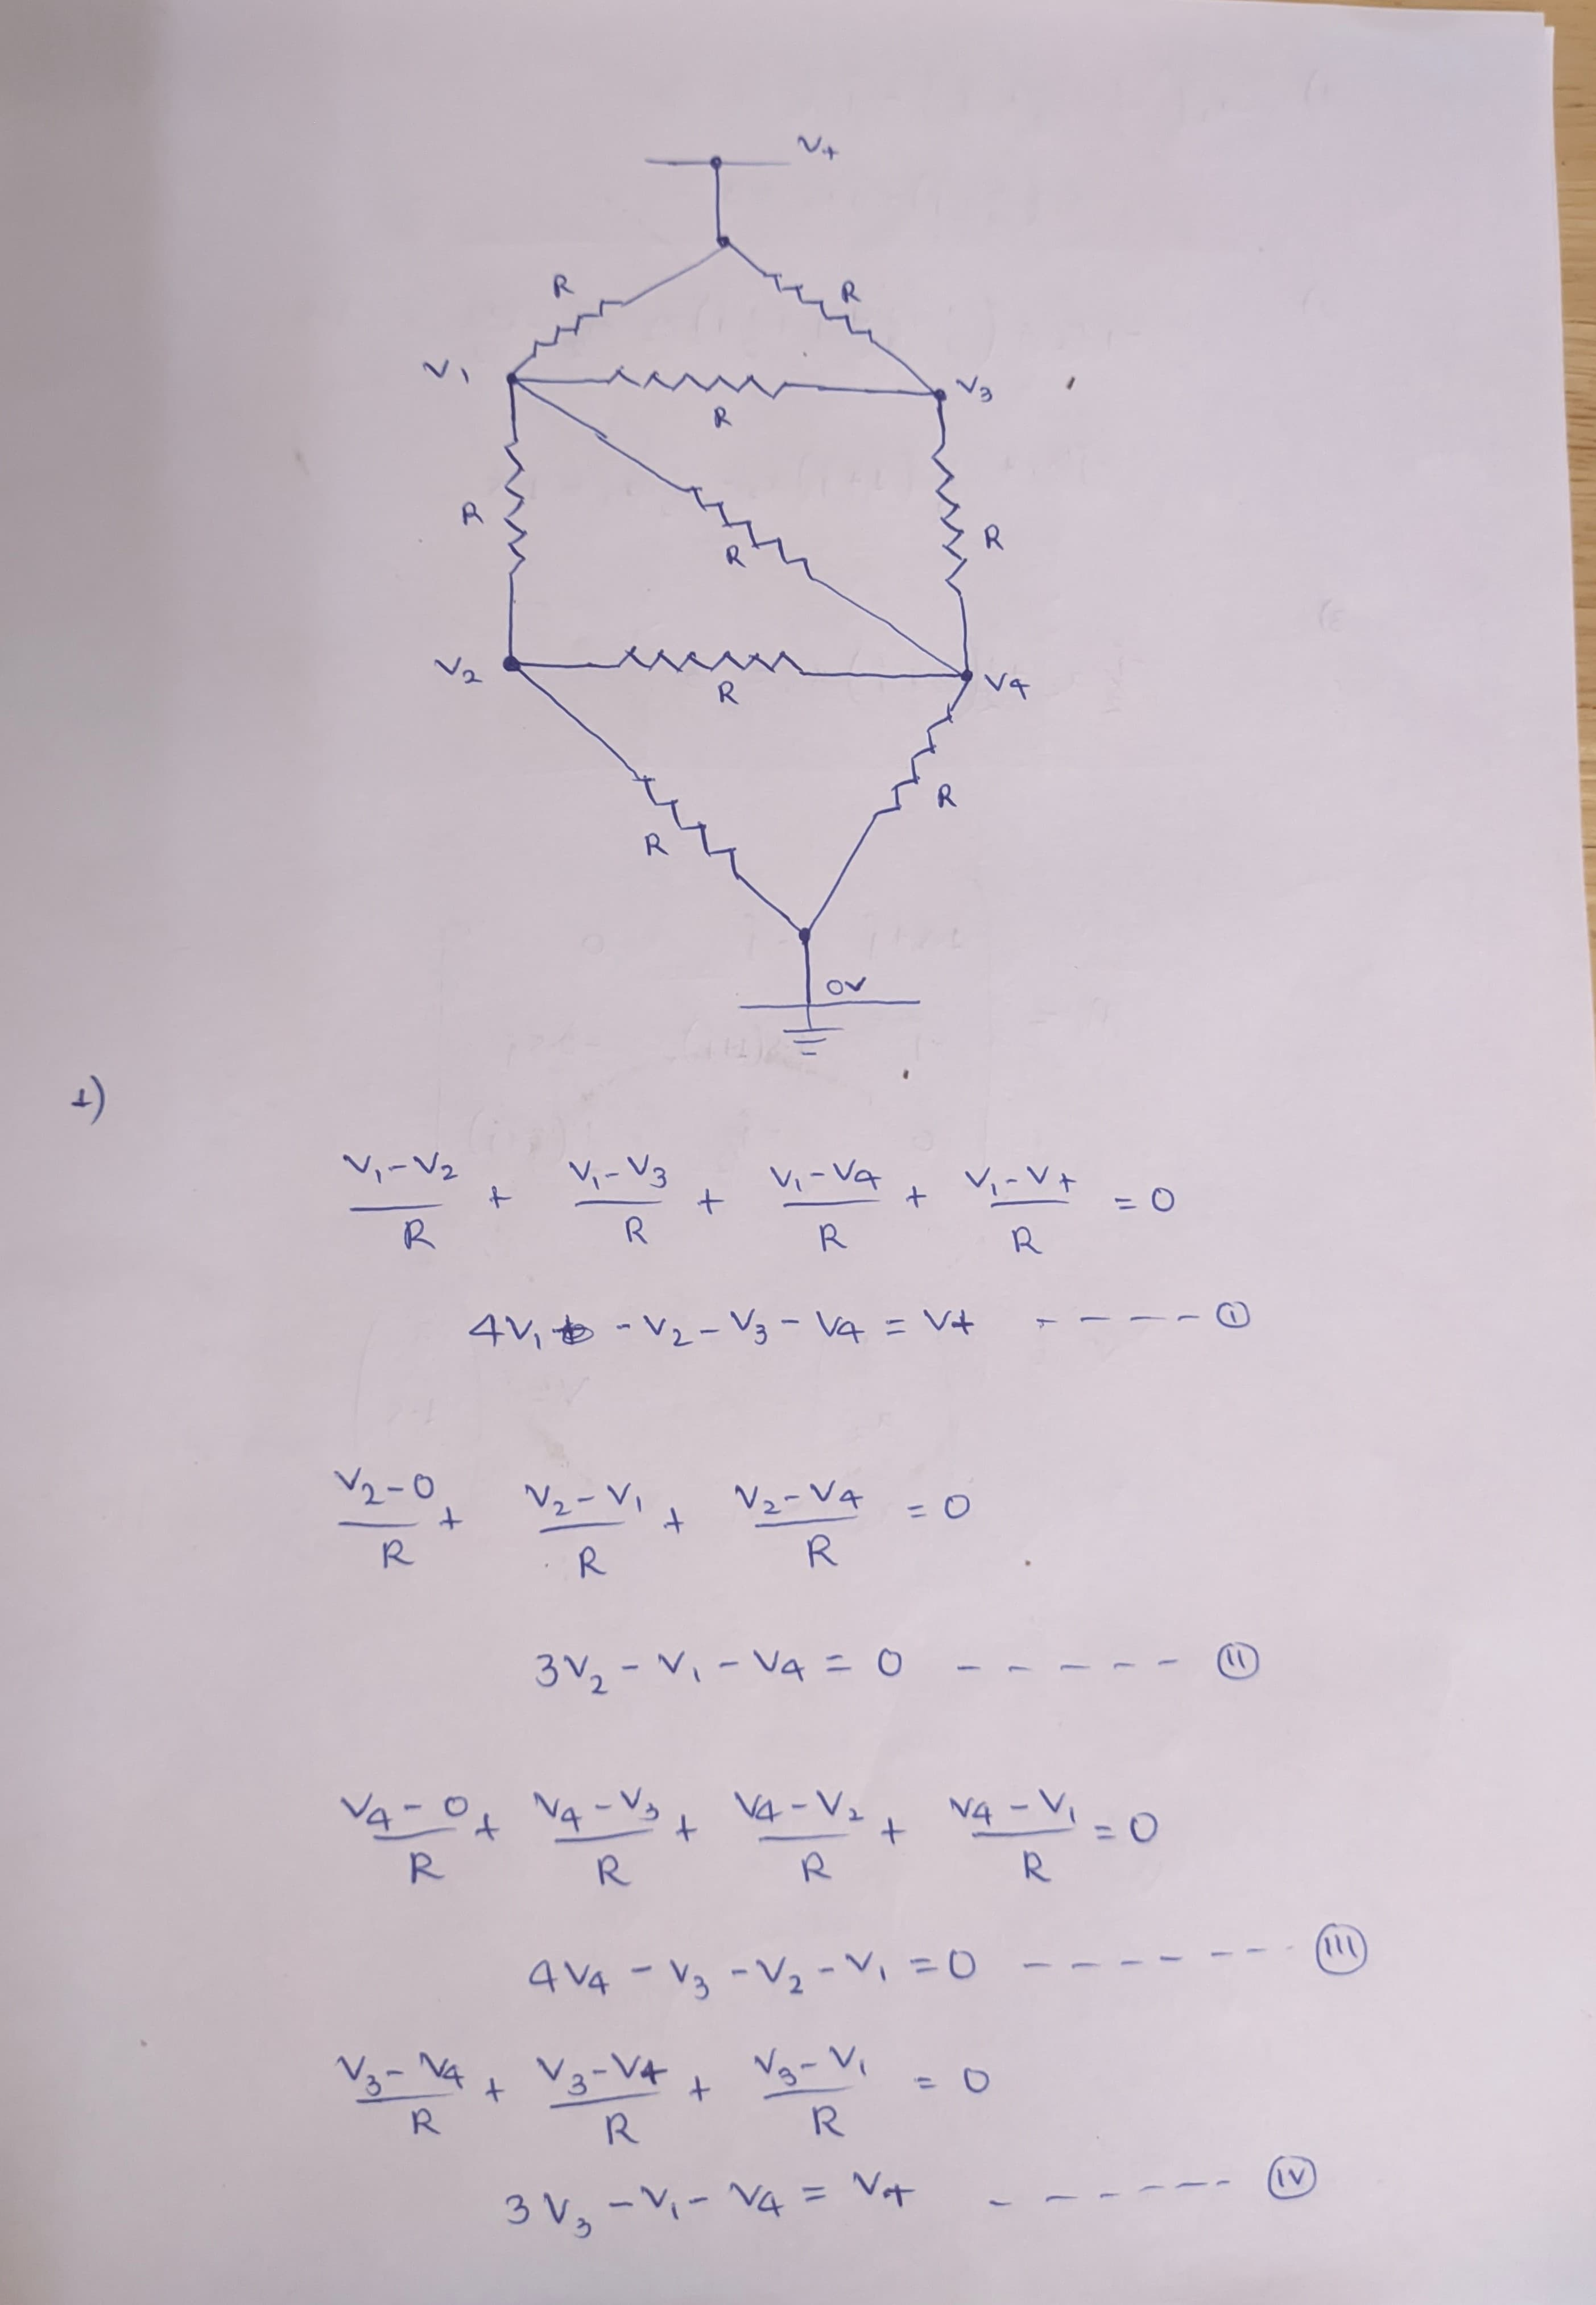

In [ ]:
B=np.array([5,0,5,0],float)
A=np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],float)

def ge(X,V):
    X.astype(float)
    N=len(X[0])
    for m in range(N):
        div=X[m,m]
        X[m,:]/=div
        V[m]/=div


        for i in range(m+1,N):
            mult=X[i,m]
            X[i,:]-=mult*X[m,:]
            V[i]-=mult*V[m]
        x=np.empty(N,float)
        for m in range(N-1,-1,-1):
            x[m]=V[m]
            for i in range(m+1,N):
                x[m] -=X[m,i]*x[i]
    print(x)
    return X,V
A1,B1=ge(A,B)

[3.         1.66666667 3.33333333 2.        ]


Question-2

In [ ]:
import numpy as np
def backsubst(A,V,flag):
 n=len(V)
 x=np.zeros(n)
 if flag=='L':
  for i in range(n):
   x[i]=(V[i]-np.dot(A[i,:i],x[:i]))/A[i,i]
 elif flag=='U':
  for i in range(n-1,-1,-1):
   x[i]=(V[i]-np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
 return x
def LU(M):
 n=len(M)
 L=np.eye(n)
 U=M.copy().astype(float)
 for i in range(n):
  for j in range(i+1,n):
   L[j,i]=U[j,i]/U[i,i]
   U[j]-=L[j,i]*U[i]
 return L,U
def partial_pivot(M,row):
 n=len(M)
 pivot_row=np.argmax(abs(M[row:n,row]))+row
 if pivot_row!=row:
  M[[row,pivot_row]]=M[[pivot_row,row]]
 return M
def LU_partial(M):
 n=len(M)
 L=np.eye(n)
 U=M.copy().astype(float)
 for i in range(n):
  U=partial_pivot(U,i)
  for j in range(i+1,n):
   L[j,i]=U[j,i]/U[i,i]
   U[j]-=L[j,i]*U[i]
 return L,U
A_2=np.array([[2,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]])
B_2=np.array([-4,9,3,7])
L,U=LU(A_2)
print('L:\n',L)
print('U:\n',U)
print('A=LU:\n',L@U)
z_2=backsubst(L,B_2,'L')
x_2=backsubst(U,z_2,'U')
print("\nSolution for AX=B:")
print("Implemented:\n",x_2)
print("Numpy's linalg:\n",np.linalg.solve(A_2,B_2))
C_2=A_2.copy()
C_2[0,0]=0
L_p,U_p=LU_partial(C_2)
z_2c=backsubst(L_p,B_2,'L')
x_2c=backsubst(U_p,z_2c,'U')
print('\nL with pivoting:\n',L_p)
print('\nU with pivoting:\n',U_p)
print('C=LU with pivoting:\n',L_p@U_p)
print("\nSolution for CX=B:")
print("Implemented:\n",x_2c)
print("Numpy's linalg:\n",np.linalg.solve(C_2,B_2))

L:
 [[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
U:
 [[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
A=LU:
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

Solution for AX=B:
Implemented:
 [ 5.17647059 -2.76470588 -2.35294118 -2.17647059]
Numpy's linalg:
 [ 5.17647059 -2.76470588 -2.35294118 -2.17647059]

L with pivoting:
 [[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.33333333 -0.1875      1.          0.        ]
 [ 0.66666667  0.875       0.11764706  1.        ]]

U with pivoting:
 [[ 3.          4.         -1.         -1.        ]
 [ 0.         -5.33333333  1.33333333  5.33333333]
 [ 0.          0.          4.25        2.        ]
 [ 0.          0.          0.         -1.235294

Question-3

In [ ]:
import math as m
import numpy as np
B=np.array([5,0,5,0],float)
A=np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],float)
X=np.linalg.solve(A,B)
print(X)

[3.         1.66666667 3.33333333 2.        ]


PROBLEM-4
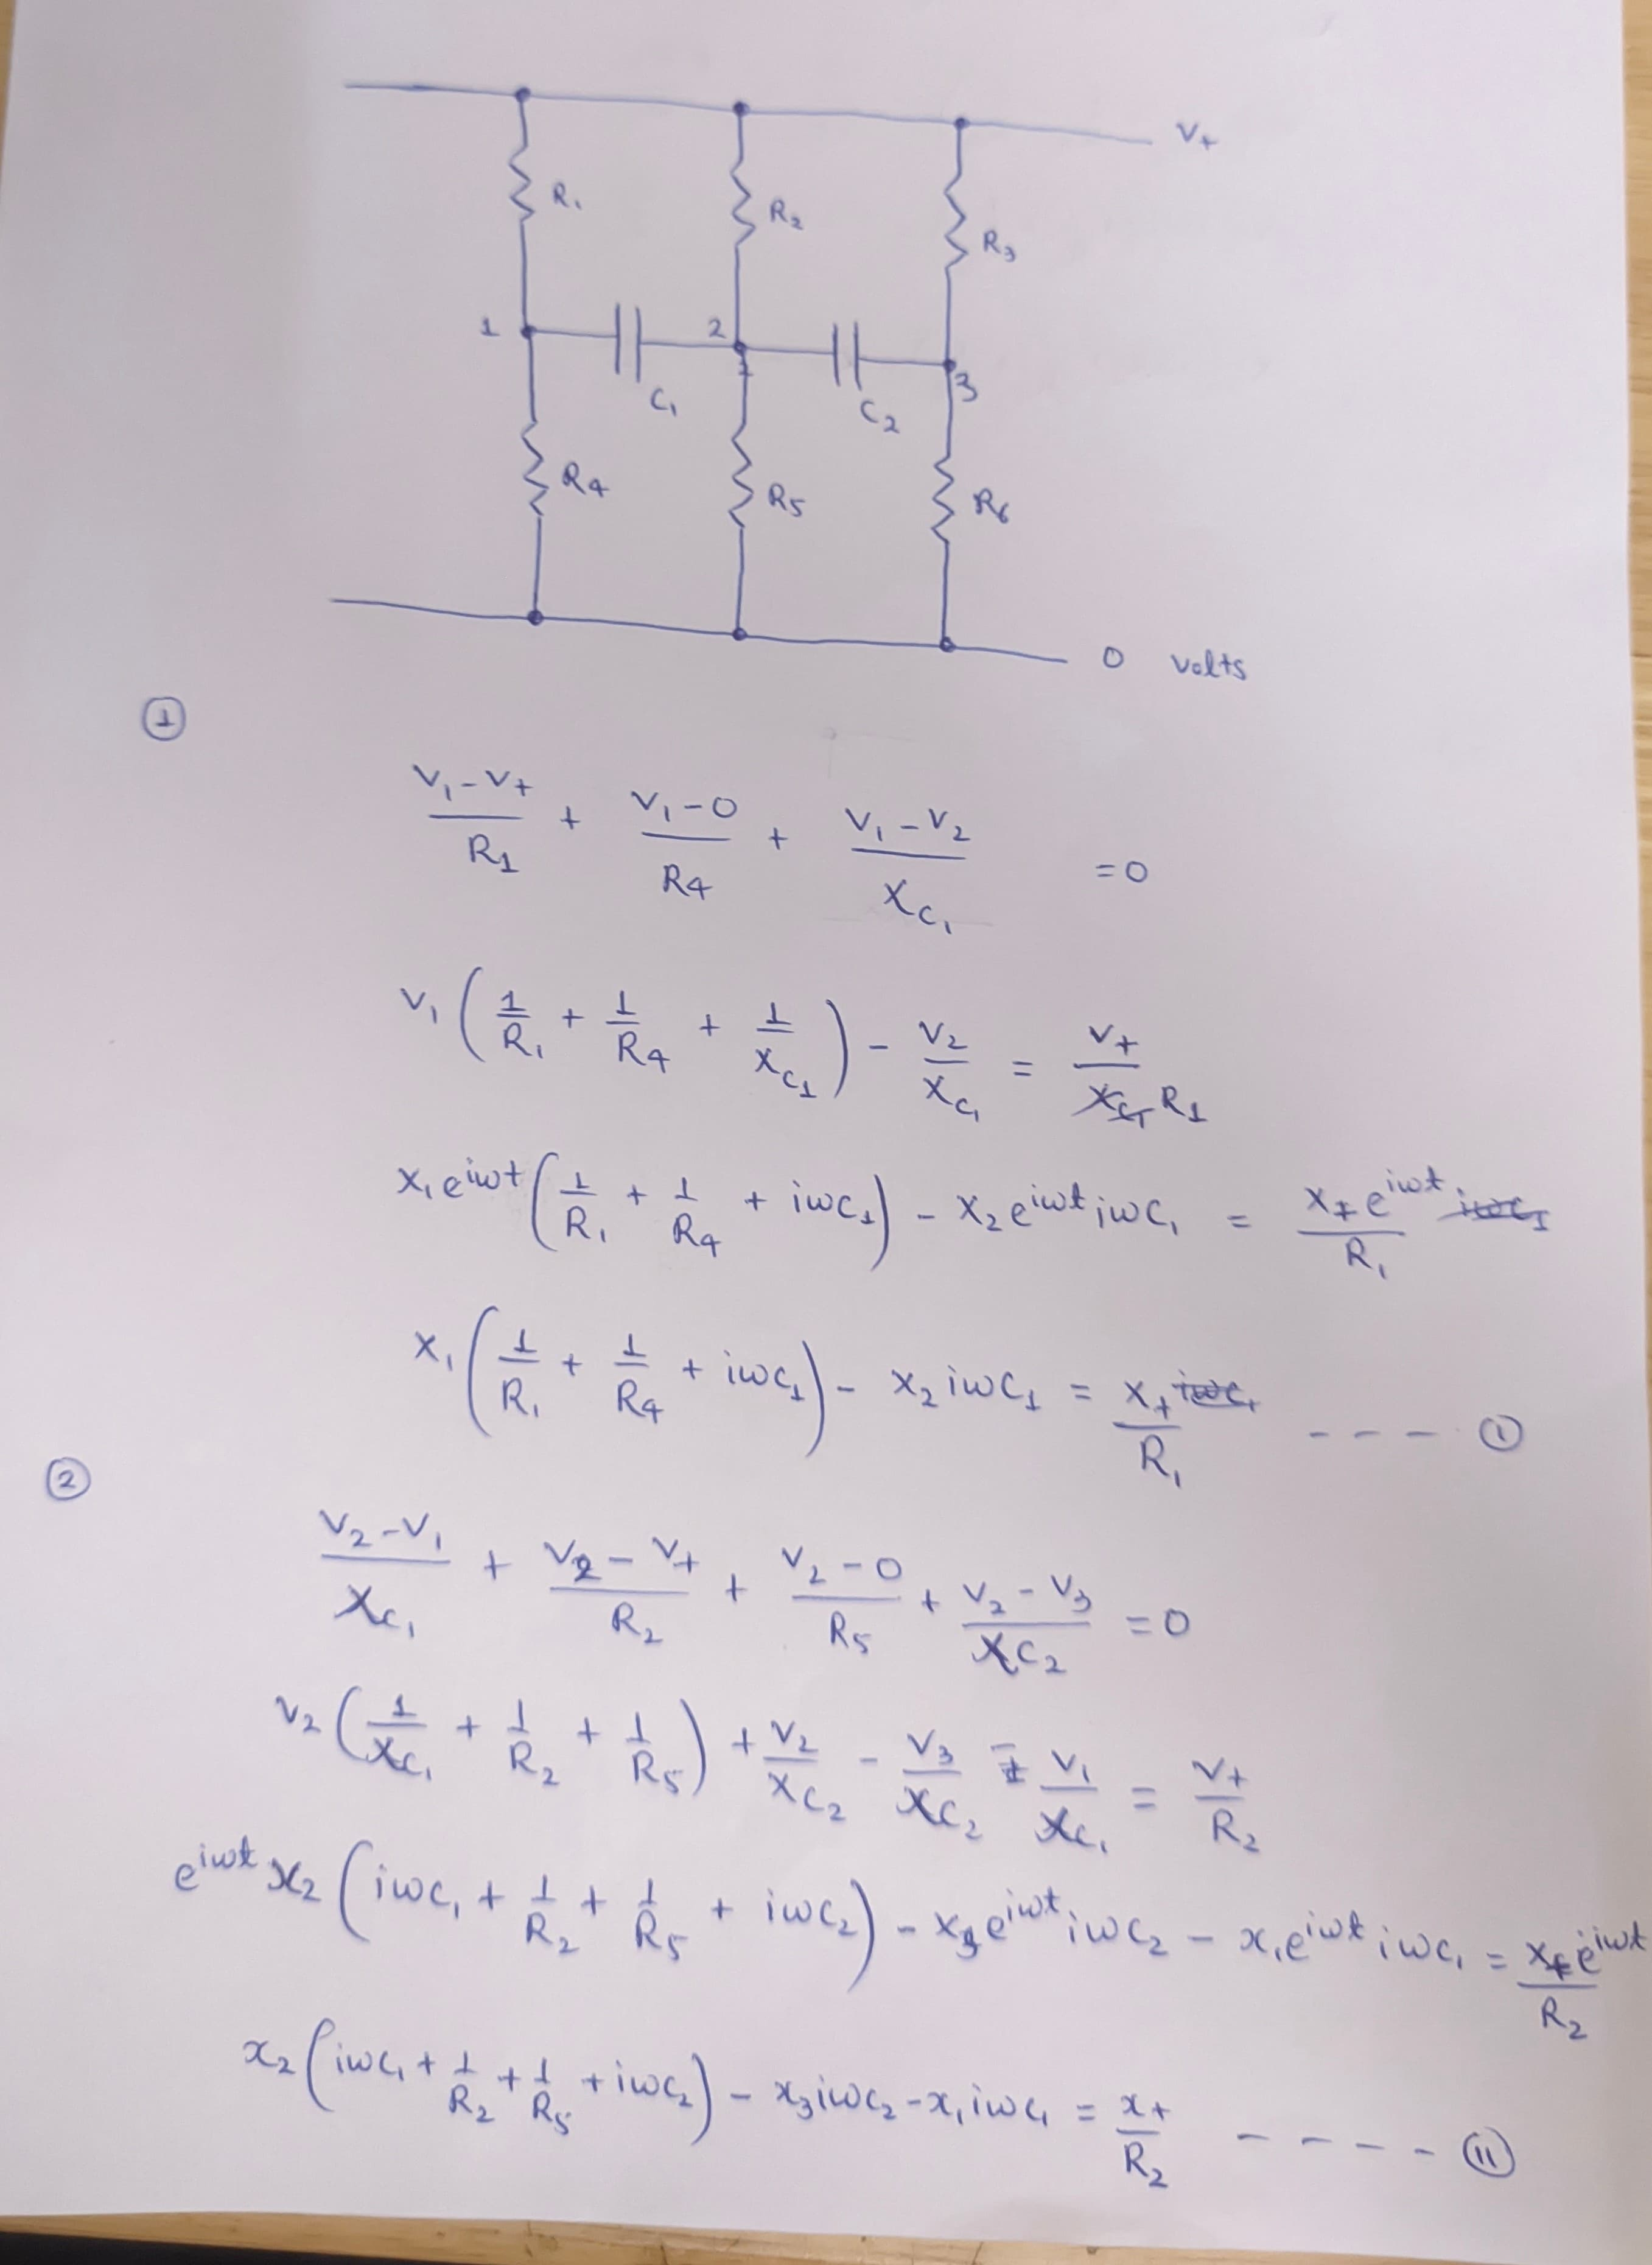

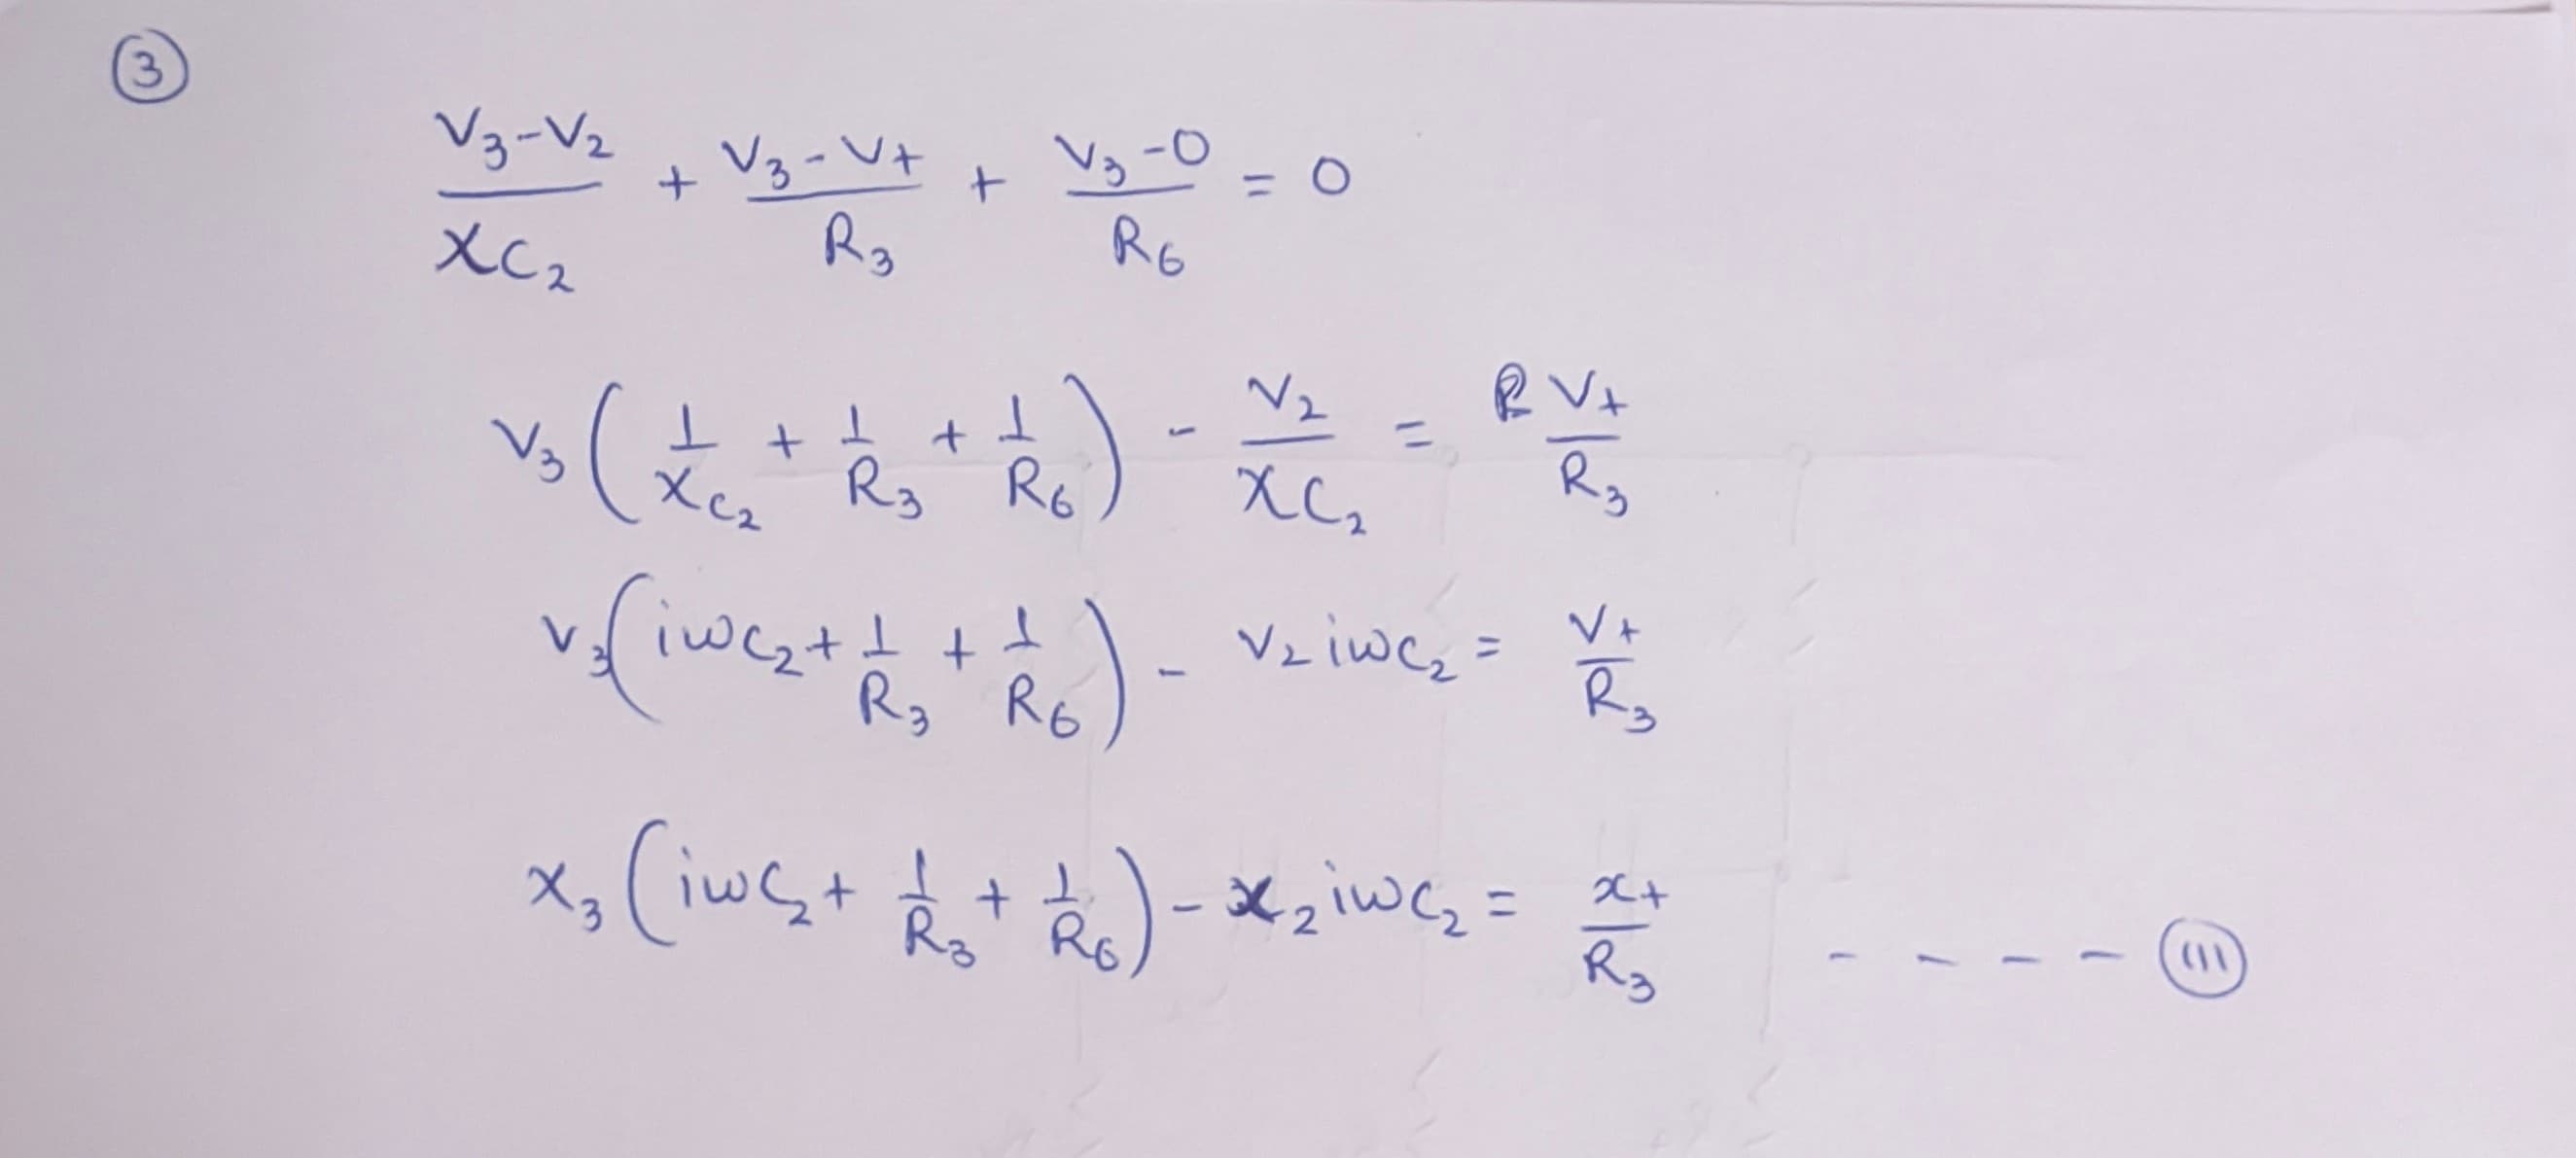

In [ ]:
import cmath as cm
import numpy as np
A=np.array([[(1.5+1j),-1j,0],[-1j,1.5+1.5j,-0.5j],[0,-0.5j,1.5+0.5j]],dtype=complex)
B=np.array([[3],[1.5],[3]],dtype=complex)
X=np.linalg.solve(A,B)
deg=180/np.pi
V1=cm.polar(complex(X[0,0]))
V2=cm.polar(complex(X[1,0]))
V3=cm.polar(complex(X[2,0]))
print(A)
print(f"Amplitude of V1 is:",V1[0],"\n","Phase of V1 in degrees=",deg*V1[1])
print("---------------------------")
print(f"Amplitude of V2 is:",V2[0],"\n","Phase of V2 in degrees=",deg*V2[1])
print("---------------------------")
print(f"Amplitude of V3 is:",V3[0],"\n","Phase of V3 in degrees=",deg*V3[1])

[[ 1.5+1.j  -0. -1.j   0. +0.j ]
 [-0. -1.j   1.5+1.5j -0. -0.5j]
 [ 0. +0.j  -0. -0.5j  1.5+0.5j]]
Amplitude of V1 is: 1.7014390658777339 
 Phase of V1 in degrees= -5.469094970111931
---------------------------
Amplitude of V2 is: 1.4806053465364069 
 Phase of V2 in degrees= 11.583418604687076
---------------------------
Amplitude of V3 is: 1.8607693200562134 
 Phase of V3 in degrees= -4.164672651865921


Question-5


In [ ]:
import numpy as np
n=int(input("Enter the number of resistors:"))
V=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if np.abs(i-j)<=2:
          V[i,j]=-1
          if i==j:
            V[i,j]=4
    V[0,0]=3;V[n-1,n-1]=3
print(V)
B=np.zeros((n))
B[1]=B[0]=5
N=len(B)
for m in range(N):
    div=V[m,m]
    V[m,:] /= div
    B[m] /= div
    for i in range(m+1,N):
        mult=V[i,m]
        V[i,:] -= mult*V[m,:]
        B[i] -= mult*B[m]
X=np.zeros(N)
for m in range(N-1,-1,-1):
    X[m] = B[m]
    for i in range(m+1,N):
        X[m] -= V[m,i]*X[i]
for j in range(0,N):
    print(f'X_{j}=',X[j])
V1=np.linalg.solve(V,B)
print(V1)

Enter the number of resistors:6
[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]
X_0= 3.725490196078432
X_1= 3.4313725490196085
X_2= 2.745098039215687
X_3= 2.2549019607843146
X_4= 1.5686274509803926
X_5= 1.2745098039215692
[3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


Problem-6
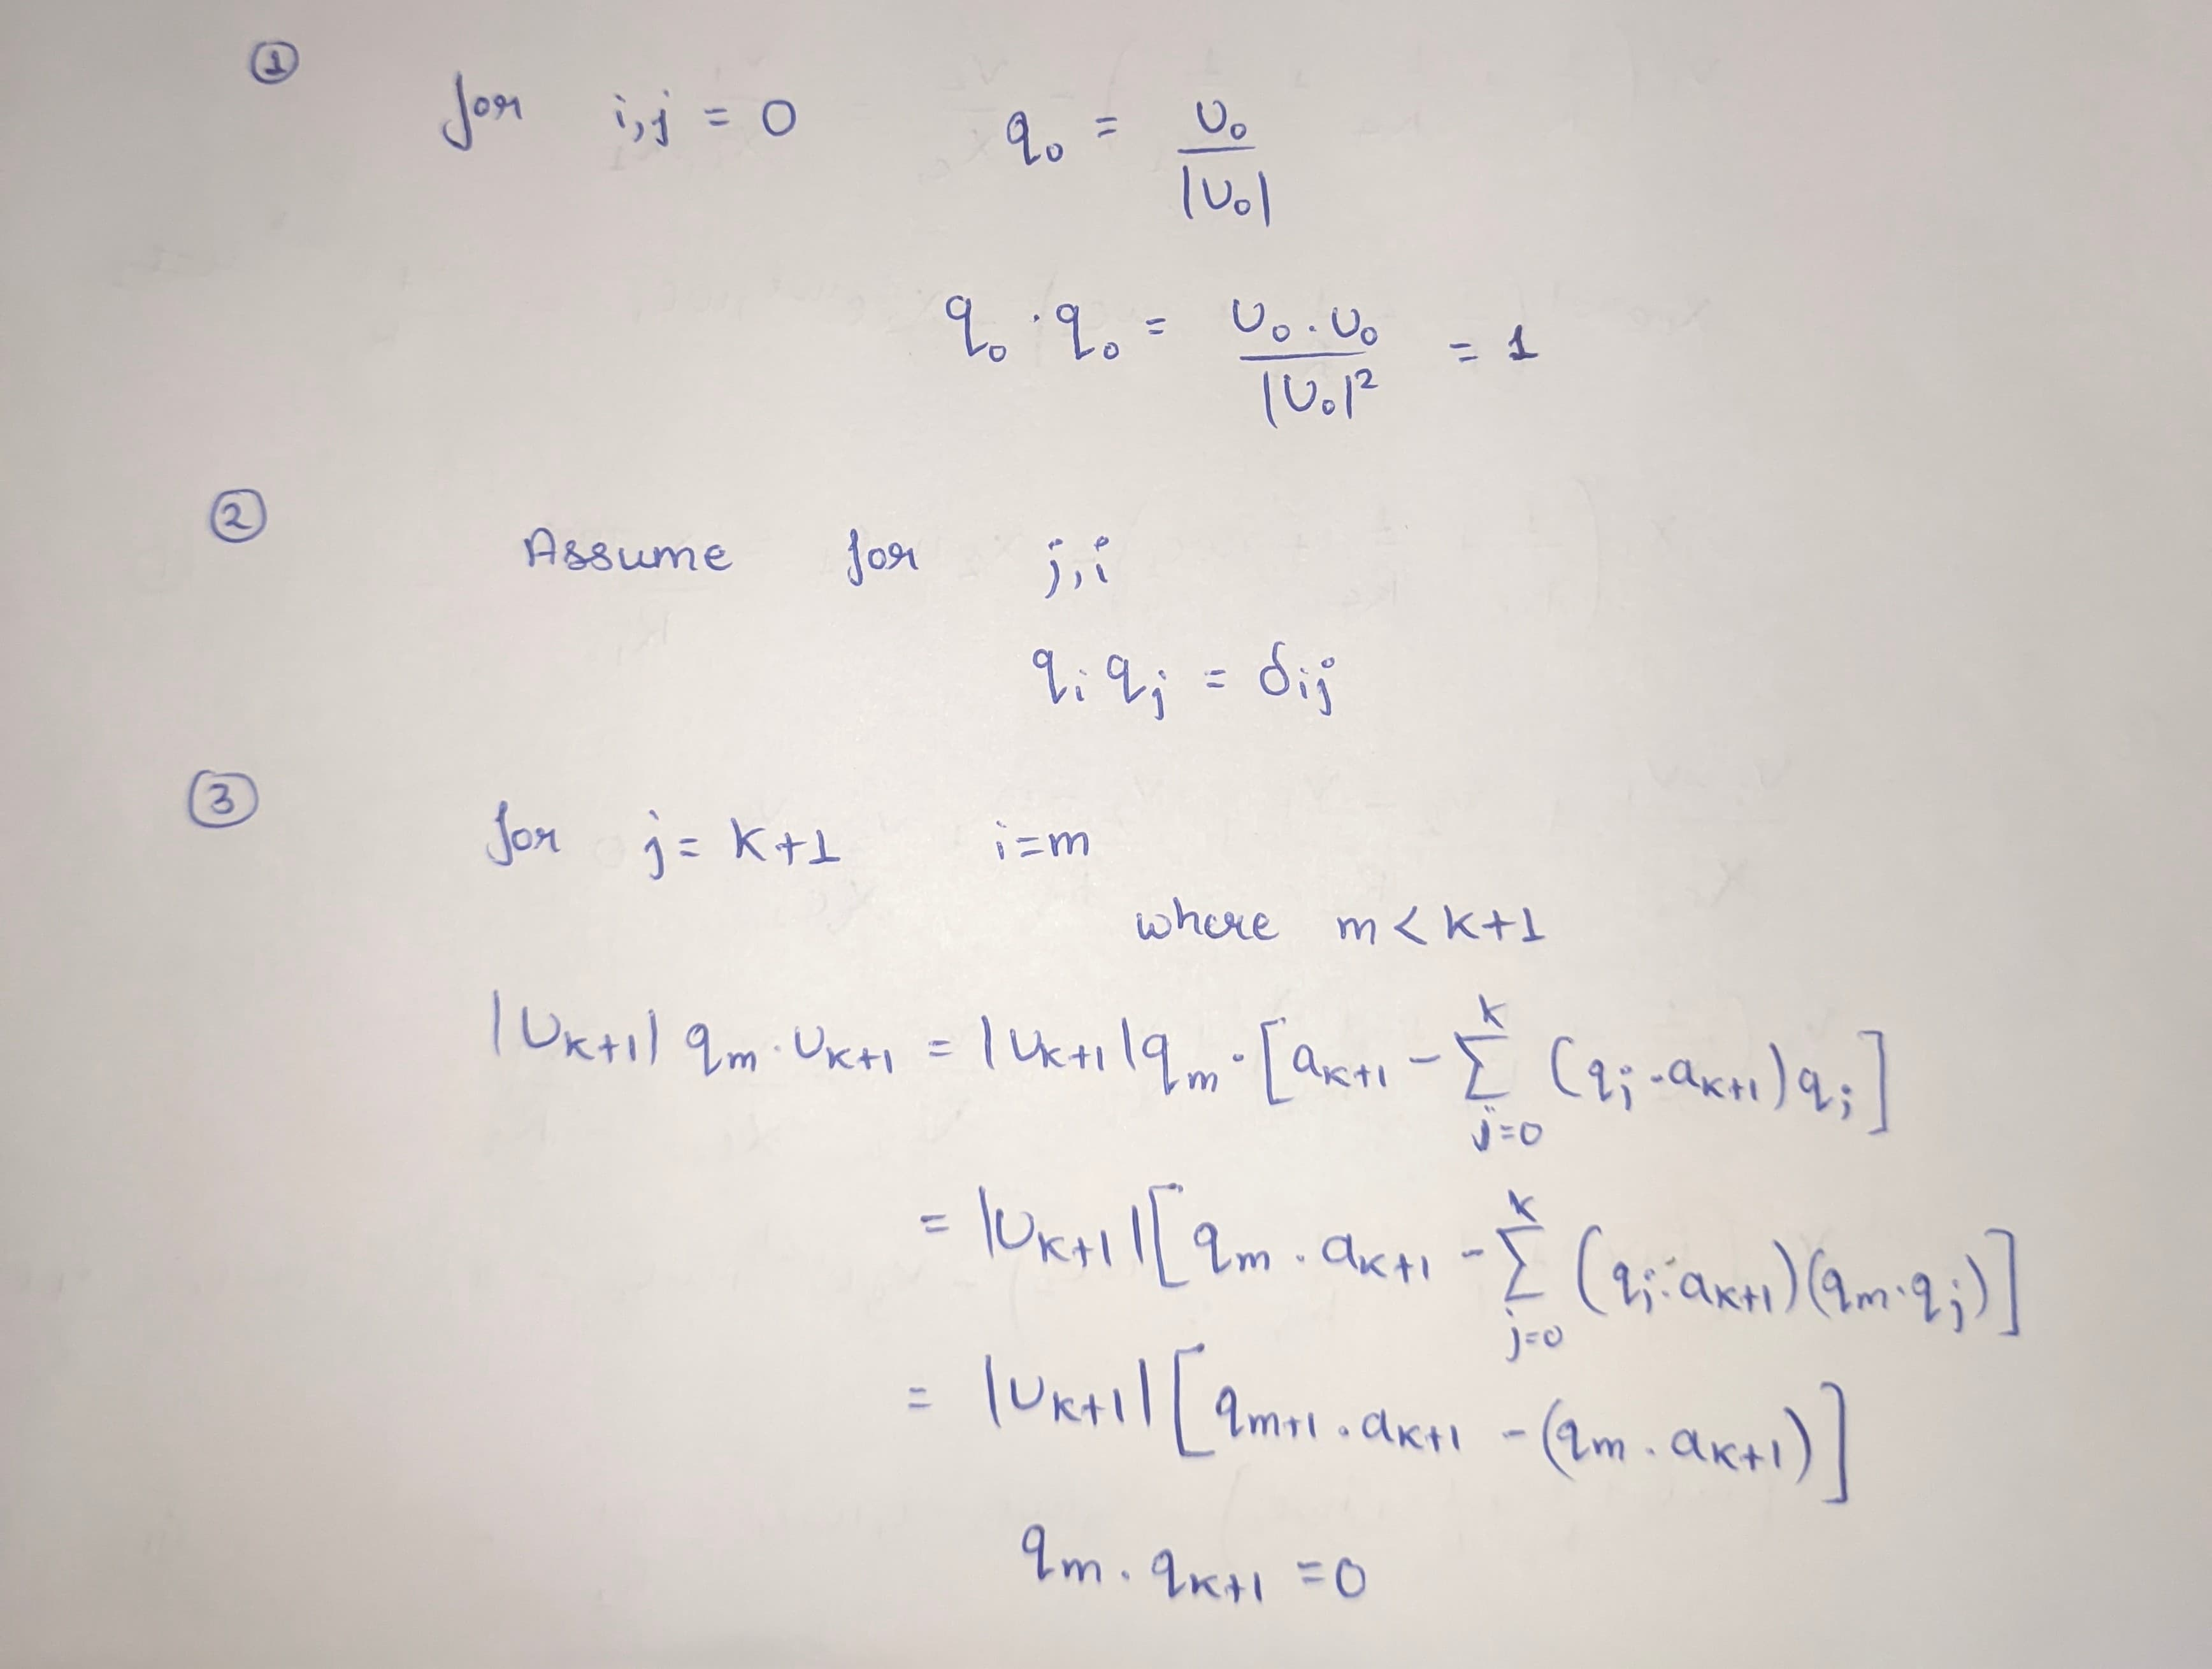

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
A=np.array([[1,4,8,4],[4,2,3,7],[8,3,6,9],[4,7,9,2]],float)
def QR(X):
 U=np.zeros((len(X),len(X)))
 Q=np.zeros((len(X),len(X)))
 u0=X[:,0]
 U[:,0]=u0
 q0=X[:,0]/np.linalg.norm(u0)
 Q[:,0]=q0
 for i in range(1,len(X)):
  Sum=0
  for j in range(i):
   Sum+=np.dot(Q[:,j],X[:,i])*Q[:,j]
  unew=X[:,i]-Sum
  U[:,i]=unew
  qnew=unew/np.linalg.norm(unew)
  Q[:,i]=qnew
 R=np.zeros((len(X),len(X)))
 for i in range(len(X)):
  for j in range(len(X)):
   if i==j:
    R[i,j]=np.linalg.norm(U[:,i])
   if j>i:
    R[i,j]=np.dot(Q[:,i],X[:,j])
 return Q,R
Q,R=QR(A)
Ri=R
Qi=Q
V=Q
for i in range(1000000):
 Ai=np.dot(Ri,Qi)
 Qi,Ri=QR(Ai)
 V=V@Qi
 if np.linalg.norm(Ai-np.diag(np.diagonal(Ai)))<1e-6:
  print("LB")
  break
Vt=np.transpose(V)
D=Vt@A@V
print(D)
#print(V)
#print(Q)
#print(R)
#print(np.dot(Q,R))

LB
[[ 2.10000000e+01  1.06821644e-07  3.25012040e-15 -4.05640222e-14]
 [ 1.06821645e-07 -8.00000000e+00  8.42397249e-09 -8.61931648e-15]
 [ 3.38708013e-15  8.42397287e-09 -3.00000000e+00 -2.29437950e-09]
 [-4.24563852e-14 -8.43051588e-15 -2.29437963e-09  1.00000000e+00]]


PROBLEM-7
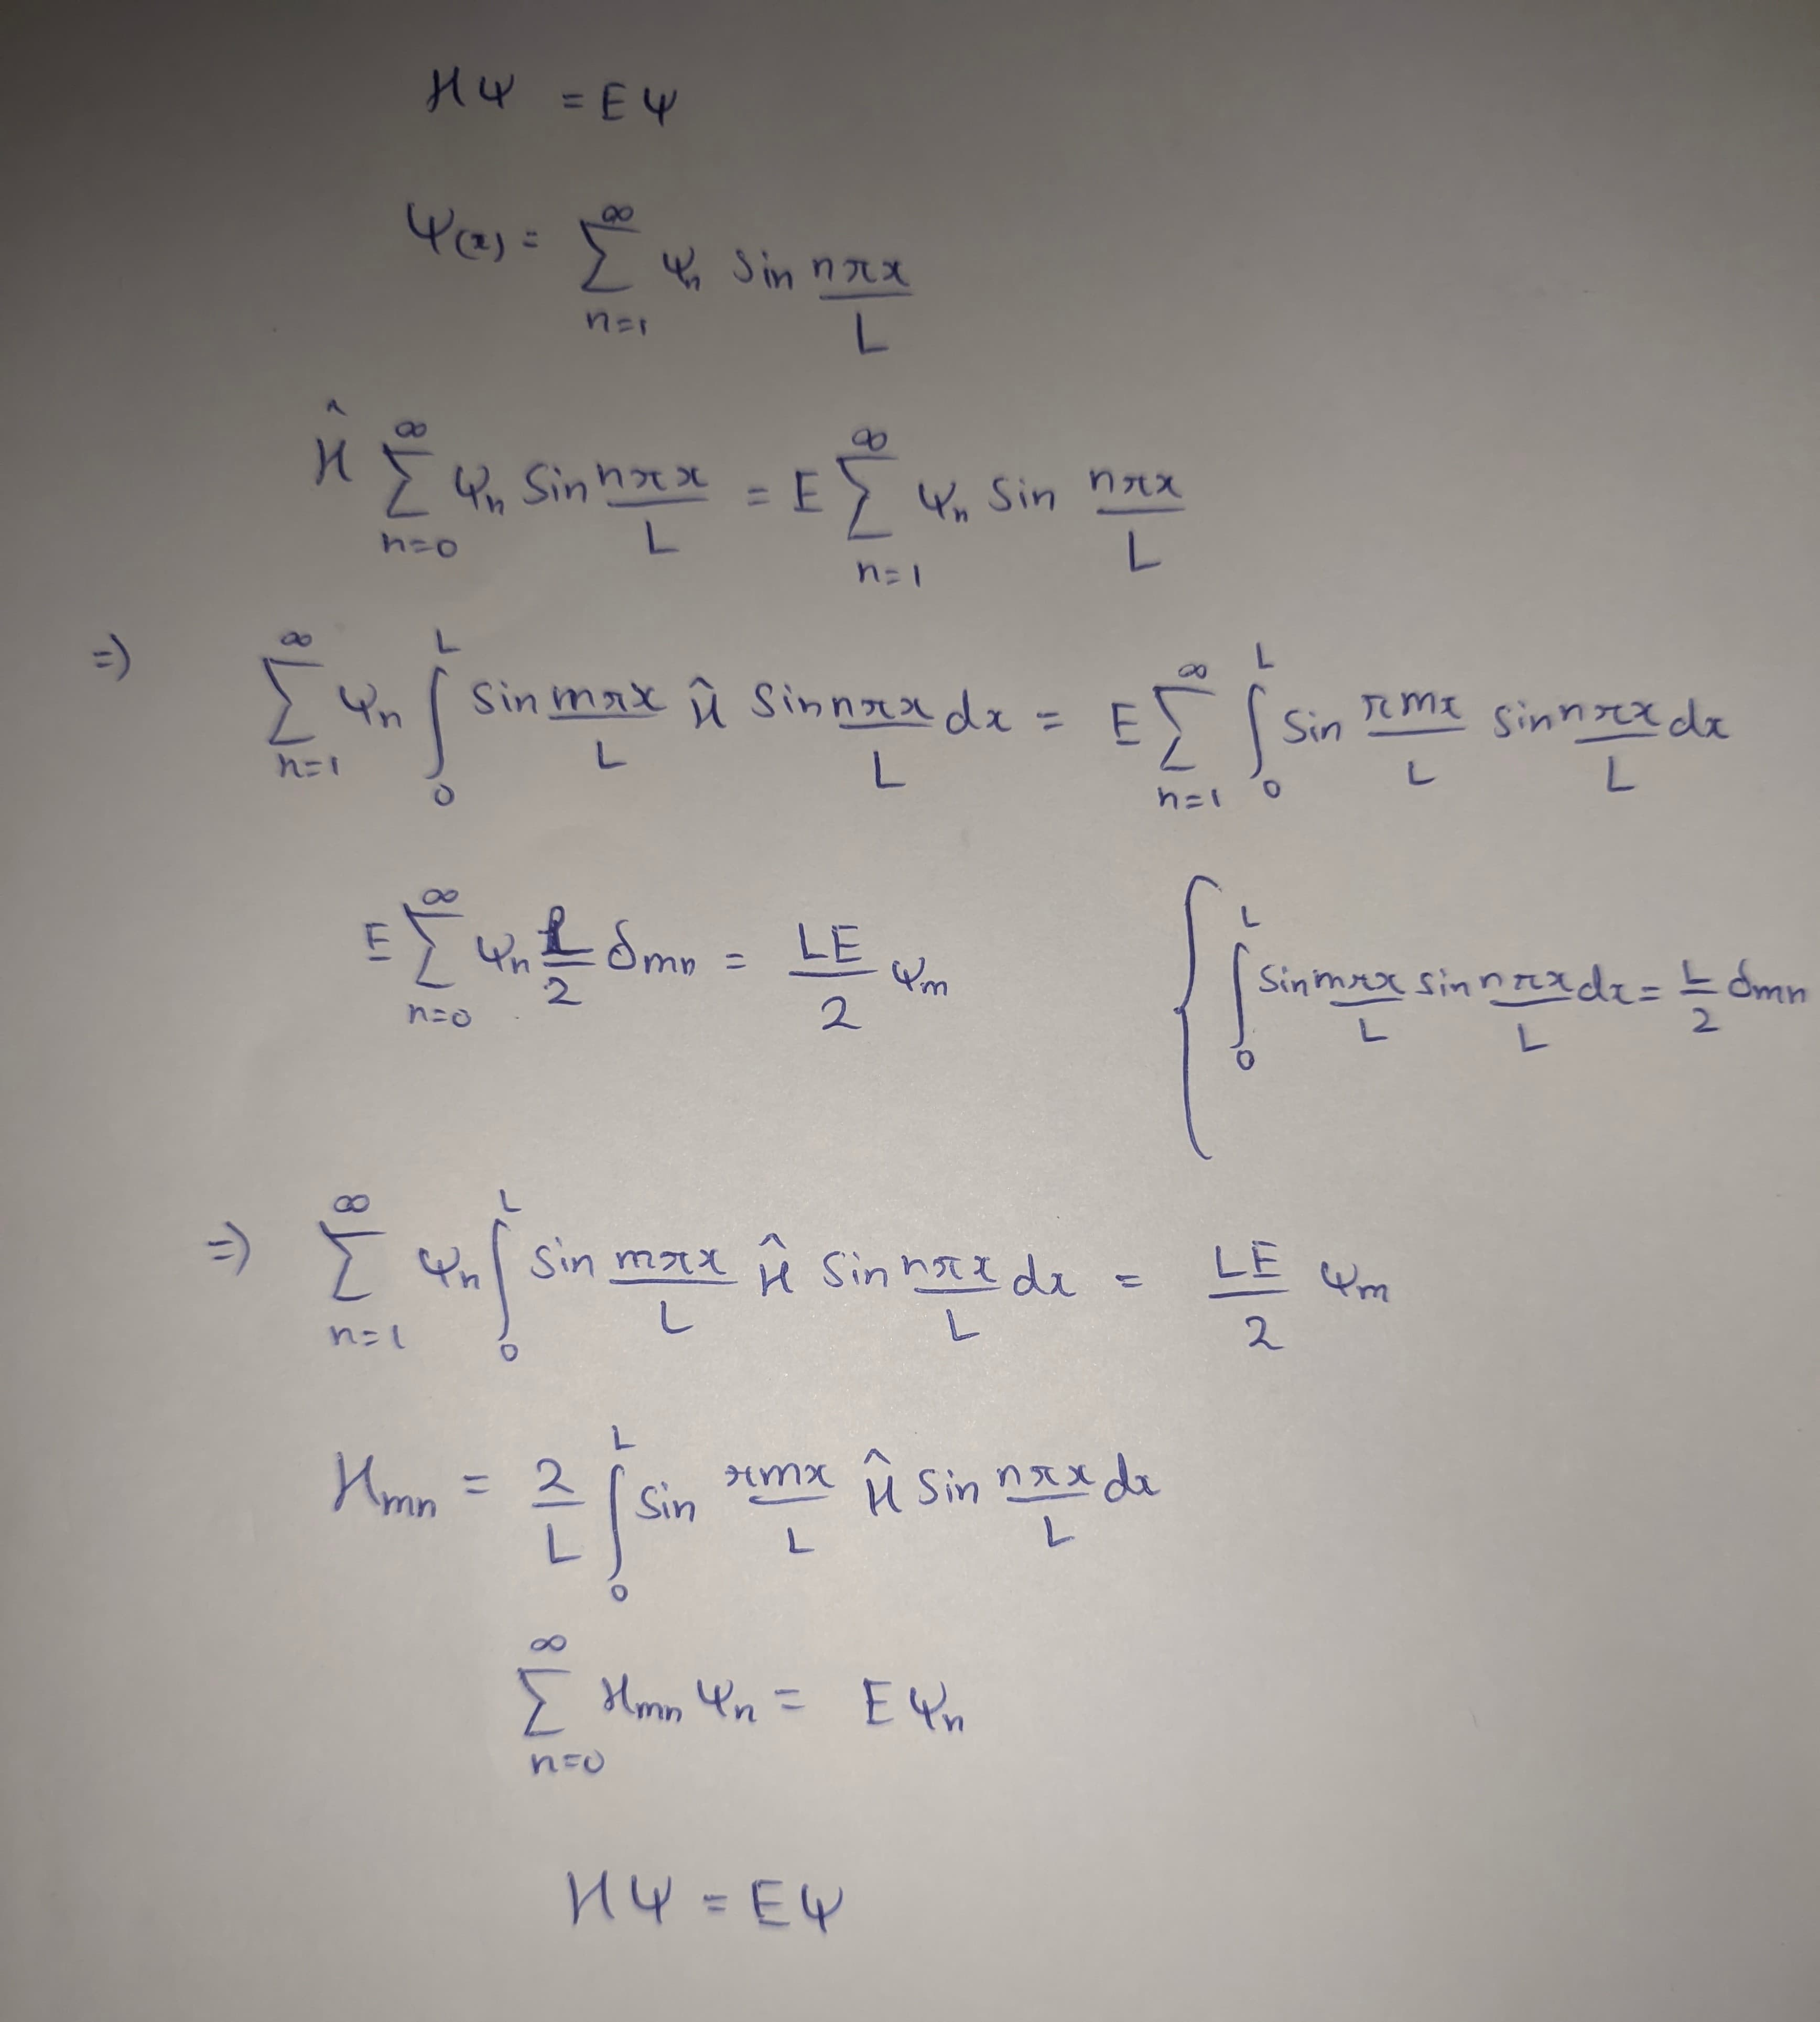

enter the value of m : 1
enter the value of n : 1
Integral1 6.25e-20
Integral2 2.5e-10
6.504117559796788
[[ 6.50411756 -1.80126549  0.         -0.14410124  0.         -0.03970136
   0.         -0.01633801  0.         -0.00827027]
 [-1.80126549  6.50411756 -1.94536673  0.         -0.1838026   0.
  -0.05603937  0.         -0.02460828  0.        ]
 [ 0.         -1.94536673  6.50411756 -1.98506809  0.         -0.20014061
   0.         -0.06430964  0.         -0.02936491]
 [-0.14410124  0.         -1.98506809  6.50411756 -2.0014061   0.
  -0.20841088  0.         -0.06906627  0.        ]
 [ 0.         -0.1838026   0.         -2.0014061   6.50411756 -2.00967637
   0.         -0.21316751  0.         -0.07205062]
 [-0.03970136  0.         -0.20014061  0.         -2.00967637  6.50411756
  -2.014433    0.         -0.21615186  0.        ]
 [ 0.         -0.05603937  0.         -0.20841088  0.         -2.014433
   6.50411756 -2.01741735  0.         -0.21814634]
 [-0.01633801  0.         -0.06430964 

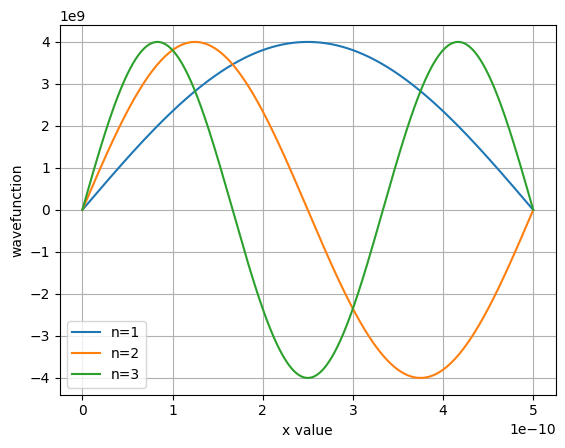

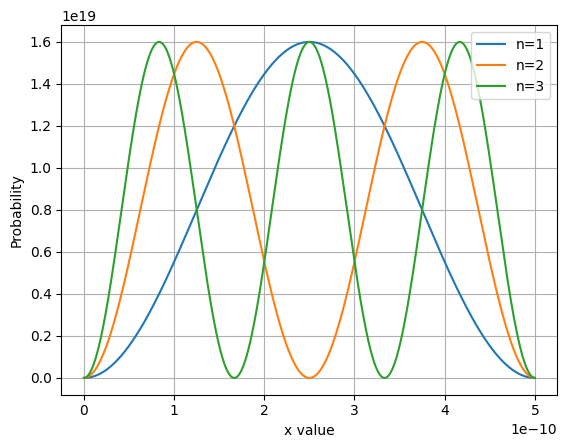

In [ ]:
# Potential well
import scipy.constants as con
import numpy as np
import matplotlib.pyplot as plt
L=5e-10
a=10
me=0.511e6/(con.c)**2
q=1
hbar=(con.hbar/con.e)
#b
m=int(input("enter the value of m : "))
n=int(input("enter the value of n : "))
g=((n*np.pi)/L)**2
h=1*hbar**2/(2*me)
def Int1(m,n):
  if (m!=n and (m+n)%2!=0):
    return (-1*(2*L/np.pi)**2)*(m*n/(m**2-n**2)**2)
  if m==n:
    return 0.25*L**2
  if (m!=n and (m+n)%2==0):
    return 0
print("Integral1",Int1(m,n))
def Int2(m,n):
  if m==n:
    return L*0.5
  else:
    return 0
print("Integral2",Int2(m,n))
def H(m,n):
  X=(2/L)*((g*h*Int2(m,n))+(a*Int1(m,n)/L))
  return X
print(H(m,n))

#c
H_mat=np.zeros((10,10))
for i in range(0,10):
  for j in range(0,10):
    H_mat[i][j]=H(i+1,j+1)
print(H_mat)
evalue1, evect1 = np.linalg.eig(H_mat)
print("Ground state energy",min(evalue1))

#d
H_mat=np.zeros((100,100))
for i in range(0,100):
  for j in range(0,100):
    H_mat[i,j]=H(i+1,j+1)
evalue2, evect2 = np.linalg.eig(H_mat)
X=np.linspace(0,L,100000)

#e
def wavefn(q):
  return (2/L)*np.sin(q*np.pi*X/L)
fig,ax = plt.subplots()
for i in range(1,4):
  q=i
  plt.plot(X,wavefn(i),label=f"n={i}")
plt.legend()
ax.set_xlabel("x value")
ax.set_ylabel("wavefunction")

plt.grid()
plt.show()
fig,ax = plt.subplots()
for i in range(1,4):
  q=i
  y=wavefn(i)**2
  plt.plot(X,y,label=f"n={i}")
plt.legend()
ax.set_xlabel("x value")
ax.set_ylabel("Probability")
plt.grid()